<a href="https://colab.research.google.com/github/vladmlengineer/NLP/blob/master/dl_nlp_imdb_ohe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
max_words=10000

In [0]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [0]:
x_train = vectorize_sequences(x_train, max_words)
x_test = vectorize_sequences(x_test, max_words)

In [0]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [77]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=10,
                    batch_size=64,
                    validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 3s 143us/sample - loss: 6.6234e-08 - acc: 1.0000 - val_loss: 1.8273 - val_acc: 0.8868
Epoch 2/10
22500/22500 [==============================] - 3s 150us/sample - loss: 4.1495e-08 - acc: 1.0000 - val_loss: 1.8436 - val_acc: 0.8864
Epoch 3/10
22500/22500 [==============================] - 3s 143us/sample - loss: 3.3230e-08 - acc: 1.0000 - val_loss: 1.8660 - val_acc: 0.8868
Epoch 4/10
22500/22500 [==============================] - 3s 144us/sample - loss: 2.7098e-08 - acc: 1.0000 - val_loss: 1.8857 - val_acc: 0.8868
Epoch 5/10
22500/22500 [==============================] - 3s 141us/sample - loss: 2.2427e-08 - acc: 1.0000 - val_loss: 1.9055 - val_acc: 0.8876
Epoch 6/10
22500/22500 [==============================] - 3s 141us/sample - loss: 1.8653e-08 - acc: 1.0000 - val_loss: 1.9231 - val_acc: 0.8868
Epoch 7/10
22500/22500 [==============================] - 3s 140us/sample - loss: 1.569

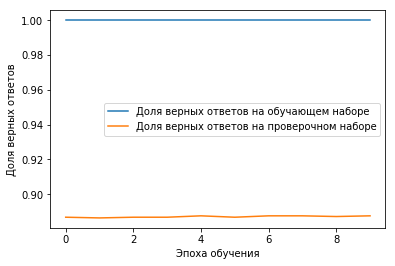

In [78]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [79]:
scores = model.evaluate(x_test, y_test, verbose=1)

25000/25000 [==============================] - 3s 133us/sample - loss: 2.2084 - acc: 0.8651


In [80]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 1))

Доля верных ответов на тестовых данных, в процентах: 86.5
